# Lecture 8: Machine Learning Tutorial

#### References

* 張鈞閔, [Hands-On Tutorial of Machine Learning in Python](https://github.com/twcmchang/hands-on-ML/blob/master/Hands-on%20Tutorial%20of%20Machine%20Learning%20in%20Python.pdf), 中央研究院資訊科學所, 2017.9.19
* 機器學習發展歷史回顧：https://kknews.cc/tech/n389r88.html
* Vikram Kamath, [Introduction to Machine Learning](https://in.pycon.org/2011/static/files/talks/11/Introduction_To_ML_Partial_2.pdf), 2011
* Pedro Domingos, [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf), University of Washington
* 林軒田, [Machine Learning Foundations](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf) (online course on youtube)
* 李宏毅, [Machine Learning](https://www.youtube.com/playlist?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49) and [Next Step of Machine Learning](https://www.youtube.com/playlist?list=PLJV_el3uVTsOK_ZK5L0Iv_EQoL1JefRL4) (online course on youtube)
* 董夢雲, [金融實務專題-人工智慧交易應用](https://github.com/andydong1209/NTU_AI/blob/master/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5%E6%87%89%E7%94%A8_Print.pdf), 2019.4.12
* 董夢雲, [人工智慧交易應用](https://github.com/andydong1209/NTUST_AITrade), 2020sp
* Marcos Lopez de Prado, [Advances in Financial Machine Learning](https://images-na.ssl-images-amazon.com/images/I/51A6sUbwG2L.jpg), 2018
<img src = "https://images-na.ssl-images-amazon.com/images/I/51A6sUbwG2L._SX329_BO1,204,203,200_.jpg" width = 100>
* Machine Learning Algorithm Cheat Sheet for Azure Machine Learning Designer: https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-cheat-sheet
* https://zhuanlan.zhihu.com/p/88307466
* MH6811 Machine Learning in Finance https://personal.ntu.edu.sg/cspun/mh6811.html

## Regression
* Linear Regression
* LASSO regression
* Ridge regression
* Logistic regression

### Example 1: linear regression (revisited)

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

x = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(100)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns = ['x', 'y'])

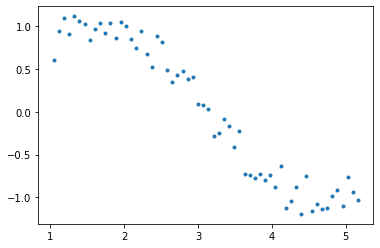

In [2]:
plt.plot(data['x'], data['y'], '.')

In [ ]:
for i in range(2, 16):
    data["x^{}".format(i)] = data['x'] ** i
data.head()

x         y       x^2       x^3       x^4       x^5       x^6  \
0  1.047198  0.603561  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  0.950196  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  1.100139  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.913191  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.117494  1.759470  2.333850  3.095735  4.106339  5.446854   

        x^7       x^8        x^9       x^10       x^11       x^12       x^13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x^14       x^15  
0   1.907219   1.997235  
1   4.707635   5.258479  
2  11.000386  13.055521  
3  24.487142  30.771450  
4  52.200353  69.241170

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
def example_regression(data, power, plot_dict, reg_type, alpha = 0):
    
    type_dict = {'Linear' : LinearRegression(normalize = True),
                 'Lasso' : Lasso(alpha = alpha, normalize = True),
                 'Ridge' : Ridge(alpha = alpha, normalize = True)}
    
    X = ['x']
    if power >=2:
        X.extend(['x^{}'.format(i) for i in range(2, power + 1)])
    
    if reg_type in type_dict:
        model = type_dict[reg_type]
    model.fit(data[X], data['y'])
    y_pred = model.predict(data[X])
    
    if power in plot_dict:
        plt.subplot(plot_dict[power])
        plt.tight_layout()
        plt.plot(data['x'], data['y'], '.')
        plt.plot(data['x'], y_pred)
        plt.title('Power: {}'.format(power))
    
    rss = sum((y_pred - data['y']) ** 2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret

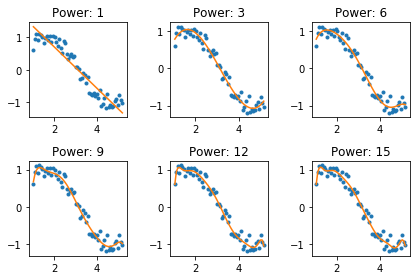

In [ ]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['degree: '.format(i) for i in range(1, 16)]

perf_Linear = pd.DataFrame(index = ind, columns = col)
plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1, 16):
    perf_Linear.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Linear')

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Linear

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5 coef_x_6  \
degree:   3.7         2    -0.65      NaN      NaN      NaN      NaN      NaN   
degree:   3.7       1.9    -0.54   -0.017      NaN      NaN      NaN      NaN   
degree:   1.1      -1.4      3.4     -1.4     0.15      NaN      NaN      NaN   
degree:   1.1      -1.1      2.9     -1.1    0.087   0.0051      NaN      NaN   
degree:     1       0.7    -0.86      1.8    -0.97     0.18   -0.012      NaN   
degree:     1      -6.1       16      -15      7.4       -2     0.28   -0.016   
degree:  0.98       -19       54      -61       36      -13      2.5    -0.26   
degree:  0.94       -66  2.1e+02 -2.9e+02  2.1e+02      -93       26     -4.2   
degree:  0.94       -70  2.3e+02 -3.1e+02  2.4e+02 -1.1e+02       31     -5.5   
degree:  0.88  -4.6e+02  1.9e+03 -3.4e+03  3.5e+03 -2.3e+03  9.9e+02 -2.9e+02   
degree:  0.88  -5.4e+02  2.3e+03 -4.2e+03  4.4e+03   -3e+03  1.4e+03 -4.3e+02   
degree:  0.88  -9.9e+02  4.6e+03 -9.4e+03  1.1e+04 -9.2e+03  5.1e+03 -2.1e+03   
degree:  0.88  -1.4e+03  6.8e+03 -1.5e+04    2e+04 -1.7e+04  1.1e+04 -4.8e+03   
degree:  0.87   2.5e+03 -1.7e+04  4.9e+04 -8.3e+04  9.5e+04 -7.6e+04  4.4e+04   
degree:  0.87   1.8e+03 -1.2e+04  3.5e+04 -5.9e+04  6.6e+04 -5.1e+04  2.8e+04   

         coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11 coef_x_12 coef_x_13  \
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:     0.011      NaN      NaN       NaN       NaN       NaN       NaN   
degree:      0.39   -0.015      NaN       NaN       NaN       NaN       NaN   
degree:      0.57    -0.03  0.00054       NaN       NaN       NaN       NaN   
degree:        57     -7.3     0.53    -0.017       NaN       NaN       NaN   
degree:        93      -13      1.2    -0.062    0.0013       NaN       NaN   
degree:   5.9e+02 -1.2e+02       18      -1.7       0.1   -0.0027       NaN   
degree:   1.6e+03 -3.9e+02       70      -8.9      0.75    -0.038   0.00088   
degree:  -1.9e+04  6.1e+03 -1.5e+03   2.6e+02       -32       2.7     -0.14   
degree:  -1.1e+04  3.4e+03 -6.9e+02        94      -6.6     -0.17     0.083   

         coef_x_14 coef_x_15  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:     0.0032       NaN  
degree:    -0.0071   0.00022

### Example 2: ridge regression

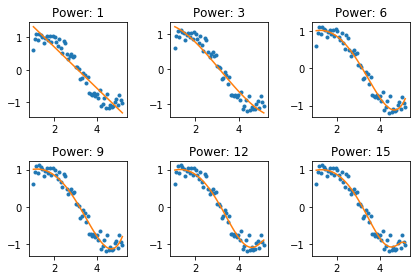

In [ ]:
perf_Ridge = pd.DataFrame(index = ind, columns = col)

for i in range(1, 16):
    perf_Ridge.iloc[i - 1,0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Ridge', alpha = 1e-3)

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5 coef_x_6  \
degree:  3.7         2    -0.65      NaN      NaN      NaN      NaN      NaN   
degree:  3.7       1.8    -0.53   -0.019      NaN      NaN      NaN      NaN   
degree:  2.7       1.3     0.24    -0.31    0.032      NaN      NaN      NaN   
degree:  1.6      0.71     0.68    -0.28    -0.03   0.0091      NaN      NaN   
degree:  1.3      0.61     0.63    -0.19   -0.034 -0.00049   0.0015      NaN   
degree:  1.3      0.68      0.5    -0.15   -0.028   -0.002   0.0004  0.00019   
degree:  1.3      0.73     0.44    -0.14   -0.025  -0.0018  0.00022   0.0001   
degree:  1.3      0.74     0.43    -0.14   -0.024  -0.0018  0.00022  9.9e-05   
degree:  1.3      0.72     0.45    -0.14   -0.025   -0.002  0.00019   0.0001   
degree:  1.2      0.69     0.47    -0.13   -0.026  -0.0024  0.00012   0.0001   
degree:  1.2      0.67     0.48    -0.13   -0.026  -0.0027  3.1e-05  8.6e-05   
degree:  1.2      0.66     0.47    -0.12   -0.026  -0.0029 -4.6e-05    7e-05   
degree:  1.1      0.67     0.46    -0.12   -0.025  -0.0029  -0.0001  5.5e-05   
degree:  1.1      0.68     0.44    -0.11   -0.024  -0.0029 -0.00014  4.4e-05   
degree:  1.1      0.69     0.43    -0.11   -0.024  -0.0029 -0.00015  3.6e-05   

         coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11 coef_x_12 coef_x_13  \
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:       NaN      NaN      NaN       NaN       NaN       NaN       NaN   
degree:   1.8e-05      NaN      NaN       NaN       NaN       NaN       NaN   
degree:   1.7e-05  3.3e-07      NaN       NaN       NaN       NaN       NaN   
degree:   2.1e-05    2e-06 -4.2e-07       NaN       NaN       NaN       NaN   
degree:   2.4e-05  3.6e-06  1.3e-07  -1.4e-07       NaN       NaN       NaN   
degree:   2.4e-05  4.4e-06    5e-07  -2.1e-08  -3.4e-08       NaN       NaN   
degree:   2.2e-05  4.5e-06  6.9e-07   5.5e-08  -1.1e-08  -7.1e-09       NaN   
degree:     2e-05  4.3e-06  7.4e-07   9.4e-08   3.5e-09  -2.9e-09  -1.3e-09   
degree:   1.7e-05    4e-06  7.3e-07   1.1e-07   1.1e-08  -4.2e-10  -6.3e-10   
degree:   1.5e-05  3.6e-06  6.9e-07   1.1e-07   1.4e-08   8.6e-10  -2.3e-10   

         coef_x_14 coef_x_15  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:        NaN       NaN  
degree:   -2.4e-10       NaN  
degree:   -1.3e-10    -4e-11

### Example 3: LASSO regression

In [ ]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['degree: {}'.format(i) for i in range(1, 16)]

perf_Lasso = pd.DataFrame(index = ind, columns = col)

plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1,16):
    perf_Lasso.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Lasso', alpha = 1e-3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
degree: 1  3.7         2    -0.64      NaN      NaN      NaN      NaN   
degree: 2  3.7       1.9    -0.54   -0.016      NaN      NaN      NaN   
degree: 3  3.7       1.9    -0.54   -0.016       -0      NaN      NaN   
degree: 4  3.1       1.5     -0.2    -0.11       -0   0.0015      NaN   
degree: 5  2.4       1.4       -0    -0.15       -0        0  0.00042   
degree: 6  2.2       1.4       -0    -0.15       -0       -0        0   
degree: 7    2       1.3       -0    -0.13  -0.0025       -0       -0   
degree: 8  1.9       1.3       -0    -0.12  -0.0043       -0       -0   
degree: 9  1.8       1.3       -0    -0.12  -0.0044       -0       -0   
degree: 10 1.9       1.3       -0    -0.12  -0.0025       -0       -0   
degree: 11 1.9       1.3       -0    -0.13 -0.00044       -0       -0   
degree: 12 1.9       1.3       -0    -0.13       -0       -0       -0   
degree: 13 1.9       1.3       -0    -0.13       -0       -0       -0   
degree: 14 1.9       1.3       -0    -0.13       -0       -0       -0   
degree: 15 1.9       1.3       -0    -0.13       -0       -0       -0   

           coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11 coef_x_12  \
degree: 1       NaN      NaN      NaN      NaN       NaN       NaN       NaN   
degree: 2       NaN      NaN      NaN      NaN       NaN       NaN       NaN   
degree: 3       NaN      NaN      NaN      NaN       NaN       NaN       NaN   
degree: 4       NaN      NaN      NaN      NaN       NaN       NaN       NaN   
degree: 5       NaN      NaN      NaN      NaN       NaN       NaN       NaN   
degree: 6   7.8e-05      NaN      NaN      NaN       NaN       NaN       NaN   
degree: 7         0  1.6e-05      NaN      NaN       NaN       NaN       NaN   
degree: 8         0        0  3.1e-06      NaN       NaN       NaN       NaN   
degree: 9         0        0        0  5.9e-07       NaN       NaN       NaN   
degree: 10        0        0        0        0   1.1e-07       NaN       NaN   
degree: 11        0        0        0        0         0   1.9e-08       NaN   
degree: 12        0        0        0        0         0   5.9e-09   2.5e-09   
degree: 13        0        0        0        0         0   6.2e-09   2.5e-09   
degree: 14        0        0        0        0         0   6.3e-09   2.5e-09   
degree: 15        0        0        0        0         0   6.3e-09   2.5e-09   

           coef_x_13 coef_x_14 coef_x_15  
degree: 1        NaN       NaN       NaN  
degree: 2        NaN       NaN       NaN  
degree: 3        NaN       NaN       NaN  
degree: 4        NaN       NaN       NaN  
degree: 5        NaN       NaN       NaN  
degree: 6        NaN       NaN       NaN  
degree: 7        NaN       NaN       NaN  
degree: 8        NaN       NaN       NaN  
degree: 9        NaN       NaN       NaN  
degree: 10       NaN       NaN       NaN  
degree: 11       NaN       NaN       NaN  
degree: 12       NaN       NaN       NaN  
degree: 13         0       NaN       NaN  
degree: 14         0         0       NaN  
degree: 15         0         0         0

### Example 4: logistic regression

In [ ]:
from sklearn import linear_model, datasets

iris = datasets.load_iris() # https://en.wikipedia.org/wiki/Iris_(plant)
print(iris.DESCR)

X = iris.data[:, :2]  # We only take the first two features.
y = iris.target

'''please change the value of C to observe the results'''
logreg = linear_model.LogisticRegression(C = 1e5)

result = logreg.fit(X, y)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure()
plot_decision_regions(X, y, result)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### Exercise

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples = 1000, centers = centers, random_state = 40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

In [ ]:
color = "rbg"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:, 0], X[:, 1], c = color)

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


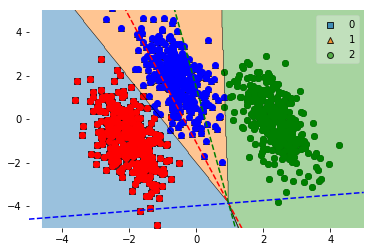

In [ ]:
for multi_class in ('multinomial', 'ovr'):
    
    from mlxtend.plotting import plot_decision_regions
    
    clf = LogisticRegression(solver = 'sag', max_iter = 100, random_state = 42, multi_class = multi_class).fit(X, y)

    print("training score : {:.3f} ({})".format(clf.score(X, y), multi_class))
    
    plt.figure()
    plot_decision_regions(X, y, clf)
    plt.axis([-5, 5, -5, 5])

    colors = "rbg"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.Paired)

    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls = "--", color = color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.axis([-5, 5, -5, 5])
plt.show()

## Support Vector Machine (SVM)

### Question: which one is the best separation?

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2,
                  random_state = 0, cluster_std = 0.60)

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)

plt.xlim(-1, 3.5);

In [ ]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(clf, ax = None):
    
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    ax.contour(X, Y, P, colors = 'k',
               levels = [-1, 0, 1], alpha = 0.5,
               linestyles = ['--', '-', '--'])

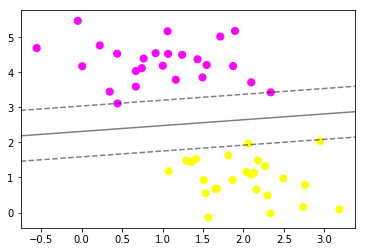

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf);

### Example: nonseparability

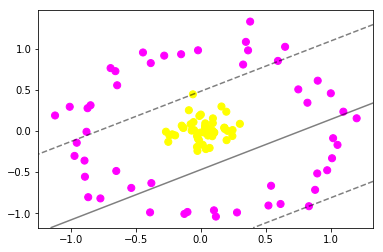

In [ ]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor =.1, noise = .1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf);

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30):
    
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'spring')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

In [ ]:
clf = SVC(kernel = 'rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 200, facecolors = 'none');
plt.axis('equal')

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(-1.2466459866935309,
 1.326019589490695,
 -1.1779541501343738,
 1.4679764674851827)

#### Exercise

In [ ]:
from sklearn import svm

In [ ]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

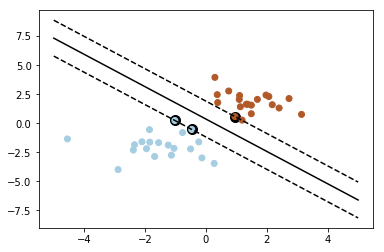

In [ ]:
# plot the hyper planes
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 100, facecolors = 'black')

# plot all points
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.Paired)

plt.axis('tight')
plt.show()

In [ ]:
clf = svm.SVC(kernel = 'linear', probability = True)
clf.fit(X, Y)
clf.predict_proba(X)

array([[8.69603484e-01, 1.30396516e-01],
       [7.79479303e-01, 2.20520697e-01],
       [9.48029428e-01, 5.19705724e-02],
       [9.64343846e-01, 3.56561538e-02],
       [9.83378522e-01, 1.66214775e-02],
       [9.46612247e-01, 5.33877535e-02],
       [9.64046990e-01, 3.59530095e-02],
       [9.70357200e-01, 2.96428004e-02],
       [9.38807027e-01, 6.11929726e-02],
       [9.90702568e-01, 9.29743247e-03],
       [9.98869415e-01, 1.13058494e-03],
       [9.80408673e-01, 1.95913268e-02],
       [9.44342251e-01, 5.56577490e-02],
       [9.88060914e-01, 1.19390856e-02],
       [7.79525986e-01, 2.20474014e-01],
       [9.78081222e-01, 2.19187784e-02],
       [9.99135848e-01, 8.64152379e-04],
       [9.89961676e-01, 1.00383239e-02],
       [8.63792836e-01, 1.36207164e-01],
       [9.93507549e-01, 6.49245096e-03],
       [2.04688420e-01, 7.95311580e-01],
       [3.09903193e-02, 9.69009681e-01],
       [5.57644661e-02, 9.44235534e-01],
       [4.82071534e-02, 9.51792847e-01],
       [1.525363

### Decision Tree
* https://github.com/twcmchang/hands-on-ML/blob/master/example/05_decision_tree.ipynb
* https://github.com/twcmchang/hands-on-ML/blob/master/example/06_gradient_boosting_regression.ipynb
* Gini impurity: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
* Tree visualization
    * https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
    * https://scikit-learn.org/stable/modules/tree.html
    * https://github.com/parrt/dtreeviz/tree/master/notebooks
* References
    * <a href = "https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ensemble-learning%E4%B9%8Bbagging-boosting%E5%92%8Cadaboost-af031229ebc3">機器學習: Ensemble learning之Bagging、Boosting和AdaBoost</a>

### Principal Component Analysis (PCA)
* Illustration for principal component analysis: http://setosa.io/ev/principal-component-analysis/
    * PCA is widely used for dimensionality reduction.
    * PCA could be done by SVD.
* https://github.com/twcmchang/hands-on-ML/blob/master/example/07_PCA.ipynb

### Clustering: K-Means
* https://github.com/twcmchang/hands-on-ML/blob/master/example/08_kmeans_clustering.ipynb
* https://github.com/twcmchang/hands-on-ML/blob/master/exercise/ex06_kmeans_clustering_color_compression.ipynb
* https://www.datacamp.com/community/tutorials/k-means-clustering-python
* Image: https://news.immigration.gov.tw/PH/UpLoad/JPG/201910/8220de51-c74c-4fb5-8d59-9c719c7b51fc.jpg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import matplotlib.image as mpimg

taipei101 = mpimg.imread("./taipei101.jpg")

Text(0.5, 1.0, '5 colors')

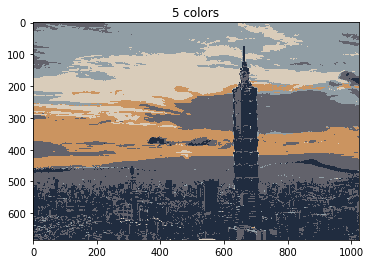

In [ ]:
from sklearn.cluster import KMeans # slow?
from sklearn.cluster import MiniBatchKMeans
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

n_colors = 5
X = (taipei101 / 255.0).reshape(-1, 3)

model = MiniBatchKMeans(n_colors)
model.fit(X)
labels = model.predict(X)

colors = model.cluster_centers_
approx = colors[labels].reshape(taipei101.shape)
approx = (255 * approx).astype(np.uint8)

plt.figure()
plt.imshow(taipei101)
plt.title('input: 16 million colors')

plt.figure()
plt.imshow(approx)
plt.title('{0} colors'.format(n_colors))

#### Exercise

In [ ]:
import pandas as pd

raw = pd.read_html("https://www.cnyes.com/twstock/etfingredient/0050.htm")
stock_list = []
for i in range(3):
    stock_list.extend(raw[i]["股票名稱"].tolist())

In [ ]:
stock_list = list(map(lambda x: str(x) + ".tw", stock_list))
print(stock_list)
print(len(stock_list))

['1101.tw', '1102.tw', '1216.tw', '1301.tw', '1303.tw', '1326.tw', '1402.tw', '1722.tw', '2002.tw', '2105.tw', '2201.tw', '2207.tw', '2301.tw', '2303.tw', '2308.tw', '2311.tw', '2317.tw', '2324.tw', '2325.tw', '2330.tw', '2347.tw', '2353.tw', '2354.tw', '2357.tw', '2382.tw', '2409.tw', '2412.tw', '2454.tw', '2474.tw', '2498.tw', '2801.tw', '2880.tw', '2881.tw', '2882.tw', '2883.tw', '2885.tw', '2886.tw', '2890.tw', '2891.tw', '2892.tw', '2912.tw', '3008.tw', '3045.tw', '3231.tw', '3481.tw', '3673.tw', '3697.tw', '4904.tw', '5880.tw', '6505.tw']
50


In [ ]:
import ffn

start_date = "2019-09-14"
tbl = ffn.data.yf(stock_list[0], field = "Close", start = start_date)
for item in stock_list[1:]:
    try:
        another_tbl = ffn.data.yf(item, field = "Close", start = start_date)
        tbl = pd.concat([tbl, another_tbl], axis = 1)
    except:
        print("Failed:", item)
        stock_list.remove(item)
        
tbl.columns = stock_list
tbl.head()

Failed: 2311.tw
Failed: 2325.tw
Failed: 3697.tw


1101.tw  1102.tw  1216.tw  1301.tw  1303.tw  1326.tw  1402.tw  \
Date                                                                        
2019-09-16       40       44       78       98       71       92       30   
2019-09-17       40       44       77       98       71       90       29   
2019-09-18       40       44       77       98       70       90       29   
2019-09-19       40       44       77       97       70       90       29   
2019-09-20       40       44       78       98       71       90       29   

            1722.tw  2002.tw  2105.tw  ...  2892.tw  2912.tw  3008.tw  \
Date                                   ...                              
2019-09-16       46       24       44  ...       22    3e+02     4005   
2019-09-17       46       23       44  ...       22    3e+02     3980   
2019-09-18       46       23       45  ...       22    3e+02     4210   
2019-09-19       46       23       44  ...       22    3e+02     4300   
2019-09-20       46       23       44  ...       22    3e+02     4300   

            3045.tw  3231.tw  3481.tw  3673.tw  4904.tw  5880.tw  6505.tw  
Date                                                                       
2019-09-16  1.1e+02       24      7.3       58       74       21    1e+02  
2019-09-17  1.1e+02       25      7.1       57       74       21    1e+02  
2019-09-18  1.1e+02       25      7.1       57       74       21    1e+02  
2019-09-19  1.1e+02       25        7       58       74       21    1e+02  
2019-09-20  1.1e+02       25      7.1       58       74       21    1e+02  

[5 rows x 47 columns]

In [ ]:
tbl2 = pd.DataFrame(columns = ["Daily return rate", "Daily vol"])
tbl2["Daily return rate"] = tbl.pct_change().mean()
tbl2["Daily vol"] = tbl.pct_change().std()

print(tbl2)

         Daily return rate  Daily vol
1101.tw            8.5e-05       0.01
1102.tw           -0.00057      0.012
1216.tw            -0.0011      0.011
1301.tw            -0.0016      0.013
1303.tw            -0.0011      0.011
1326.tw             -0.002       0.01
1402.tw            -0.0017      0.012
1722.tw           -0.00085      0.013
2002.tw            -0.0013     0.0097
2105.tw            -0.0017      0.013
2201.tw            -0.0015      0.018
2207.tw             0.0011      0.024
2301.tw            -0.0012      0.017
2303.tw             0.0004      0.016
2308.tw            -0.0016      0.018
2317.tw             -8e-06      0.017
2324.tw           -0.00057     0.0086
2330.tw            0.00086      0.015
2347.tw           -0.00071       0.01
2353.tw            -0.0019      0.015
2354.tw            -0.0015      0.015
2357.tw           -0.00073      0.013
2382.tw            0.00064      0.012
2409.tw            -0.0005      0.026
2412.tw           -0.00042     0.0056
2454.tw     

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = np.asarray(tbl2)
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

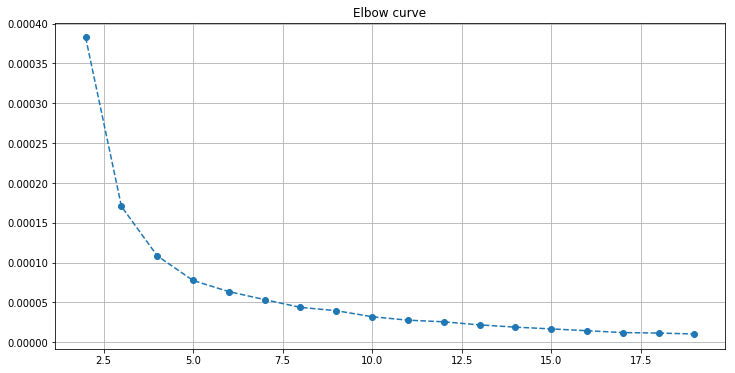

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize = (12, 6))
plt.plot(range(2, 20), distorsions, "o--")
plt.title("Elbow curve")
plt.grid(True)
plt.show()

In [ ]:
from scipy.cluster.vq import kmeans, vq

data = np.asarray(tbl2)
K = 5
centroids, _ = kmeans(data, K)
idx, _ = vq(data, centroids)

print(idx)

[0 2 0 2 0 0 2 2 0 2 3 1 3 3 3 3 4 2 0 2 2 2 2 1 4 3 1 1 4 4 0 0 0 0 4 0 0
 4 0 1 4 3 1 1 4 4 2]


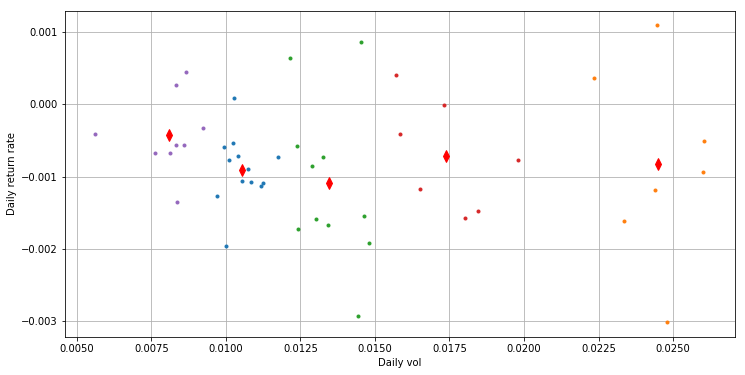

In [ ]:
plt.figure(figsize = (12, 6))
for i in range(0, K):
    plt.plot(data[idx == i, 1], data[idx == i, 0], ".")

plt.plot(centroids[:, 1], centroids[:, 0], "dr", markersize = 8)
plt.xlabel("Daily vol")
plt.ylabel("Daily return rate")
plt.grid(True)
plt.show()

In [ ]:
print(tbl2.idxmax())

Daily return rate    2207.tw
Daily vol            2409.tw
dtype: object


## Reinforcement Learning
* Q-Learning: https://en.wikipedia.org/wiki/Q-learning
    * Flappy bird bot using reinforcement learning in python: https://github.com/chncyhn/flappybird-qlearning-bot
![](https://camo.githubusercontent.com/d92b8c5ac27bd63f11909ffa5cf7482e1a714ed6/687474703a2f2f692e696d6775722e636f6d2f30304d663332302e706e67)
* Luis Campos, Deep Reinforcement Trading (28/11/2018): https://quantdare.com/deep-reinforcement-trading/
    * https://github.com/edwardhdlu/q-trader
* More github projects using machine learning on financial time series data: https://github.com/firmai/financial-machine-learning
* Google Tensorflow: https://www.tensorflow.org/

### Example: FX Trading Strategy
* Reference: http://nekopuni.holy.jp/2014/08/pythonreinforcement-learning-fx-trading-strategy/ (中文摘要: https://zhuanlan.zhihu.com/p/24913014)
* Data source: https://fred.stlouisfed.org/categories/32991

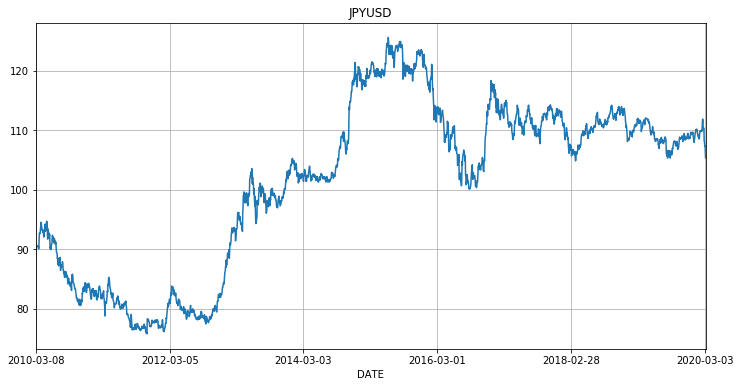

In [ ]:
tbl = pd.read_csv("./EXJPUS.csv", header = 0)
tbl = tbl[tbl["DEXJPUS"] != "."]
tbl["DEXJPUS"] = tbl["DEXJPUS"].apply(float)
tbl.set_index("DATE", inplace = True)
tbl["DEXJPUS"].plot(grid = True, figsize = (12, 6), title = "JPYUSD")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import mpl_toolkits.mplot3d

class RLMomentum():
    
    def __init__(self, tbl):
        
        self.data = tbl
        self.ret = self.data / self.data.shift(1) - 1
        self.ret = self.ret.fillna(0)
       
        self.window_short = 5
        self.window_long = 20
        self.samples = len(self.data)
        self.states = 6
        self.actions = 3   # Policy: long, flat, short
        self.epsilon = 0.1
        self.gamma = 0.8   # Discount factor
        self.mc = 100      # Rounds of Monte Carlo simulation

        self.q = np.zeros((self.states, self.states, self.actions))
        self.rewards = np.zeros((self.states, self.states, self.actions))
        self.count = np.zeros((self.states, self.states, self.actions), dtype = np.int16)
        self.isVisited = np.zeros((self.states, self.states, self.actions), dtype = np.bool)

        self.momentum = np.zeros(self.samples)
   
    def init(self):
        
        self.count = np.zeros((self.states, self.states, self.actions), dtype = np.int16)
        self.isVisited = np.zeros((self.states, self.states, self.actions), dtype = np.bool)
   
    def currentState(self, signal):
        
        signal = float(signal)
        sep = np.linspace(-1, 1, self.states - 1)
        return sum(sep < signal)
        
    def selectAction(self, state_short, state_long):
        
        if (self.q[state_short, state_long, :] == 0).sum() == self.actions:
            return np.random.randint(0, self.actions)
        else:
            if np.random.random(1) < self.epsilon:
                return np.random.randint(0, self.actions)
            else:
                return np.argmax(self.q[state_short, state_long, :])

    def actionToPosition(self, action):
        
        if action == 0:
            return -1
        elif action == 1:
            return 0
        elif action == 2:
            return 1

    def updateRewards(self, reward, state_short, state_long, action):
        
        self.isVisited[state_short, state_long, action] = True
        self.rewards = self.rewards + reward.values * (self.gamma ** self.count)
        self.count = self.count + self.isVisited

    def updateQ(self, itr):
        
        self.q = (self.q * itr + self.rewards) / (itr + 1)

    def episode(self):
        
        for i in range(self.samples - 1):
            
            if i <= self.window_long - 1:
                self.momentum[i] = self.ret.ix[i]
            else:
                sub_short = self.momentum[i - self.window_short : i - 1]
                sub_long = self.momentum[i - self.window_long : i - 1]
               
                state_short = self.currentState(np.mean(sub_short) / np.std(sub_short) * np.sqrt(252))
                state_long = self.currentState(np.mean(sub_long) / np.std(sub_long) * np.sqrt(252))

                action = self.selectAction(state_short, state_long)

                reward = self.ret.ix[i + 1] * self.actionToPosition(action)
                self.updateRewards(reward, state_short, state_long, action)
           
                self.momentum[i] = reward

    def monteCarlo(self):
        
        for i in range(self.mc):
            self.init()
            self.episode()
            print("Episode", i, "done:", sum(self.momentum))
            self.updateQ(i)
       
            #plt.plot(100 * (1 + self.momentum).cumprod(), label="RL-momentum "+str(i))

        plt.plot(100 * (1 + self.ret).cumprod(), label = "long-only")
        plt.plot(100 * (1 + self.momentum).cumprod(), label = "RL-momentum")
        plt.legend(loc = "best")
        plt.show()
       
        #plot Q-value matrix
        x = np.linspace(0, 5, self.states)
        y = np.linspace(0, 5, self.states)
        x,y = np.meshgrid(x, y)
       
        for i in range(self.actions):
            if i == 0:
                position = "short"
            elif i == 1:
                position = "flat"
            elif i == 2:
                position = "long"

            fig = plt.figure(figsize = (12, 6))
            ax = fig.gca(projection = '3d')
           
            ax.set_xlabel("state_short")
            ax.set_ylabel("state_long")
            ax.set_zlabel("Q-value")
            ax.set_title("Q-value for " + position + " position")
            #ax.view_init(90, 90)
            urf = ax.plot_surface(x, y, self.q[:, :, i], rstride = 1, cstride = 1, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

            plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less


Episode 0 done: 0.12444268433120542
Episode 1 done: -0.1010139967023147
Episode 2 done: 0.22786889326029236


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in double_scalars


Episode 3 done: 0.0023056546620963125
Episode 4 done: 0.16526487524754918
Episode 5 done: -0.1330664375113313
Episode 6 done: 0.312419709336321
Episode 7 done: 0.16349696681529124
Episode 8 done: 0.06556193372500663
Episode 9 done: -0.12365841618309548
Episode 10 done: -0.23630267038395714
Episode 11 done: -0.10661851542757717
Episode 12 done: -0.16539250324567423
Episode 13 done: -0.022252895293049857
Episode 14 done: 0.014783918149084418
Episode 15 done: -0.3307900719233643
Episode 16 done: -0.07031790977375418
Episode 17 done: -0.31857405616766843
Episode 18 done: -0.3444717008711923
Episode 19 done: 0.227762924167769
Episode 20 done: 0.1075549490790233
Episode 21 done: 0.22141891237166278
Episode 22 done: 0.393620832746846
Episode 23 done: -0.28061056424786524
Episode 24 done: -0.30374822585658157
Episode 25 done: -0.357102208484556
Episode 26 done: -0.31238768985047827
Episode 27 done: 0.15517761762689009
Episode 28 done: -0.008679293899601648
Episode 29 done: 0.3450358635513414
E

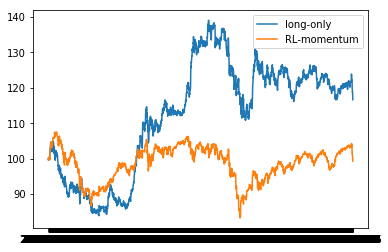

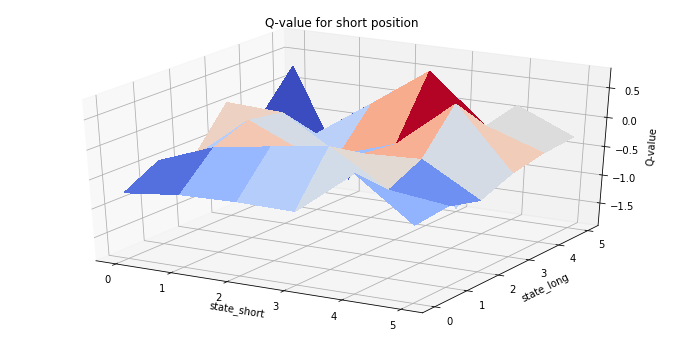

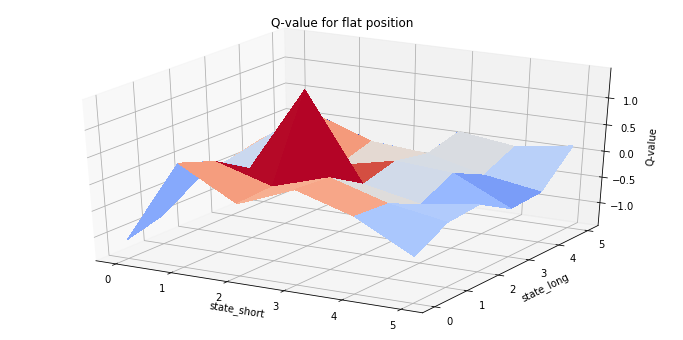

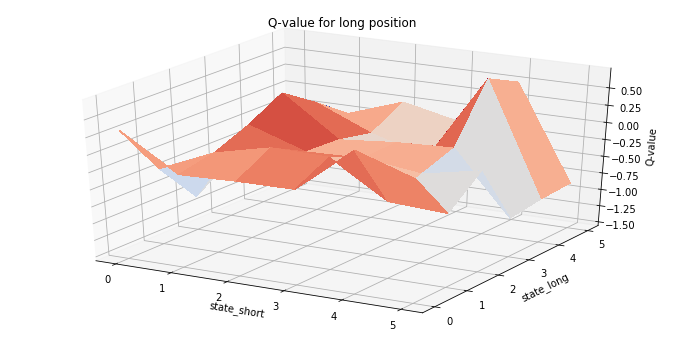

In [ ]:
RLMomentum(tbl).monteCarlo()